In [ ]:
Column information
1)Pregnancies (임신횟수) =>Number of times pregnant

2)Glucose (포도당) =>Plasma glucose concentration a 2 hours in an oral glucose tolerance test

3)BloodPressure (혈압) =>Diastolic blood pressure (mm Hg)

4)SkinThickness (삼두근 피부 두께) =>Triceps skin fold thickness (mm)

5)Insulin (2시간 혈청 인슐린) =>2-Hour serum insulin (mu U/ml)

6)BMI (체질량지수) =>Body mass index (weight in kg/(height in m)^2)

7)DiabetesPedigreeFunction (당뇨병 혈통 기능) =>Diabetes pedigree function

8)Age =>Age (years)

9)Outcome =>Class variable (0 or 1) 268 of 768 are 1, the others are 0

In [ ]:
#########################

In [ ]:
 # 머신러닝 모델들 적용

In [ ]:
#########################

In [19]:
## diabetes.csv 머신러닝 분류모델  -->  당뇨병 여부 분류

# Logistic Regression 이 가장 높은 정확도를 보이고 있습니다.

import numpy as np
import pandas as pd
from collections import Counter
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline
from sklearn.metrics import make_scorer, accuracy_score, f1_score
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer
from sklearn.decomposition import PCA

# 데이터 로드
url = "https://github.com/MyungKyuYi/AI-class/raw/main/diabetes.csv"
df = pd.read_csv(url)

# 0 값을 NaN으로 변환
cols = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI']
df[cols] = df[cols].replace(0, np.nan)



# KNN Imputer 인스턴스 생성, k=5로 설정
imputer = KNNImputer(n_neighbors=5)
# 결측치 대체를 위해 KNN Imputer 적용
imputed_data = imputer.fit_transform(df)
# 대체된 데이터를 DataFrame으로 변환하고, 컬럼 이름 재지정
df = pd.DataFrame(imputed_data, columns=df.columns)


# 특성과 레이블 분리
X = df.drop('Outcome', axis=1)
y = df['Outcome']

# 데이터 스케일링
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# PCA 적용
pca = PCA(n_components=2)  # 2차원으로 차원 축소
X_pca = pca.fit_transform(X_scaled)



# 모델 정의
models = {
    "SVM": SVC(kernel='rbf', gamma='scale', probability=True),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(n_estimators=100),
    "Decision Tree": DecisionTreeClassifier(),
    "KNN": KNeighborsClassifier()
}


# 훈련 데이터와 테스트 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# SMOTE 적용
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# 클래스 비율 확인
print('Original dataset shape %s' % Counter(y_train))
print('Resampled dataset shape %s' % Counter(y_train_smote))


Original dataset shape Counter({0.0: 401, 1.0: 213})
Resampled dataset shape Counter({0.0: 401, 1.0: 401})


In [ ]:
############################################################

In [ ]:
#머신러닝 훈련

In [ ]:
###################################

In [20]:


# 교차 검증 준비
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)


# 성능 평가
scores = {}
for name, model in models.items():
    cv_accuracy = cross_val_score(model, X_train_smote, y_train_smote, cv=cv, scoring='accuracy')
    cv_f1 = cross_val_score(model, X_train_smote, y_train_smote, cv=cv, scoring='f1')
    
    scores[name] = {
        'Accuracy': np.mean(cv_accuracy),
        'F1 Score': np.mean(cv_f1)
    }



Cross-validation scores:
SVM: Accuracy = 0.732, F1 Score = 0.753
Logistic Regression: Accuracy = 0.733, F1 Score = 0.728
Random Forest: Accuracy = 0.758, F1 Score = 0.762
Decision Tree: Accuracy = 0.739, F1 Score = 0.734
KNN: Accuracy = 0.742, F1 Score = 0.753


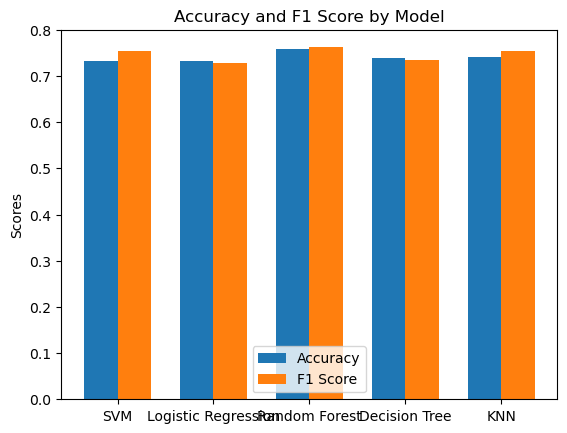

In [21]:
# 결과 출력
print("Cross-validation scores:")
for model, metrics in scores.items():
    print(f"{model}: Accuracy = {metrics['Accuracy']:.3f}, F1 Score = {metrics['F1 Score']:.3f}")

# 그래프로 표시
fig, ax = plt.subplots()
ind = np.arange(len(models))  # the x locations for the groups
width = 0.35  # the width of the bars

acc_bars = ax.bar(ind - width/2, [scores[name]['Accuracy'] for name in models], width, label='Accuracy')
f1_bars = ax.bar(ind + width/2, [scores[name]['F1 Score'] for name in models], width, label='F1 Score')

ax.set_ylabel('Scores')
ax.set_title('Accuracy and F1 Score by Model')
ax.set_xticks(ind)
ax.set_xticklabels(models.keys())
ax.legend()

plt.show()

In [22]:
from sklearn.metrics import classification_report, accuracy_score

# 모델 평가를 위한 함수
def evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)  # 모델 훈련
    y_pred = model.predict(X_test)  # 테스트 데이터셋으로 예측
    accuracy = accuracy_score(y_test, y_pred)  # 정확도 계산
    print(f"모델: {model.__class__.__name__}")
    print("정확도:", accuracy)
    print("분류 보고서:")
    print(classification_report(y_test, y_pred))

# SMOTE 적용된 데이터를 사용하여 모든 모델 훈련 및 평가
for name, model in models.items():
    print(f"모델 이름: {name}")
    evaluate_model(model, X_train_smote, y_train_smote, X_test, y_test)
    print("-" * 60)

모델 이름: SVM
모델: SVC
정확도: 0.6948051948051948
분류 보고서:
              precision    recall  f1-score   support

         0.0       0.85      0.64      0.73        99
         1.0       0.55      0.80      0.65        55

    accuracy                           0.69       154
   macro avg       0.70      0.72      0.69       154
weighted avg       0.74      0.69      0.70       154

------------------------------------------------------------
모델 이름: Logistic Regression
모델: LogisticRegression
정확도: 0.7077922077922078
분류 보고서:
              precision    recall  f1-score   support

         0.0       0.84      0.68      0.75        99
         1.0       0.57      0.76      0.65        55

    accuracy                           0.71       154
   macro avg       0.70      0.72      0.70       154
weighted avg       0.74      0.71      0.71       154

------------------------------------------------------------
모델 이름: Random Forest
모델: RandomForestClassifier
정확도: 0.6948051948051948
분류 보고서:
           

In [ ]:
#########################

In [ ]:
# 오토 인코더 훈련

In [ ]:
#######################

In [39]:

import numpy as np
import pandas as pd
from collections import Counter
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline
from sklearn.metrics import make_scorer, accuracy_score, f1_score
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer
from sklearn.decomposition import PCA

# 데이터 로드
url = "https://github.com/MyungKyuYi/AI-class/raw/main/diabetes.csv"
df = pd.read_csv(url)

# 0 값을 NaN으로 변환
cols = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI']
df[cols] = df[cols].replace(0, np.nan)


# KNN Imputer 인스턴스 생성, k=5로 설정
imputer = KNNImputer(n_neighbors=5)
# 결측치 대체를 위해 KNN Imputer 적용
imputed_data = imputer.fit_transform(df)
# 대체된 데이터를 DataFrame으로 변환하고, 컬럼 이름 재지정
df = pd.DataFrame(imputed_data, columns=df.columns)


# 특성과 레이블 분리
X = df.drop('Outcome', axis=1)
y = df['Outcome']

# 데이터 스케일링
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# PCA 적용
pca = PCA(n_components=2)  # 2차원으로 차원 축소
X_pca = pca.fit_transform(X_scaled)

# 훈련 데이터와 테스트 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# SMOTE 적용
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# 클래스 비율 확인
print('Original dataset shape %s' % Counter(y_train))
print('Resampled dataset shape %s' % Counter(y_train_smote))


Original dataset shape Counter({0.0: 401, 1.0: 213})
Resampled dataset shape Counter({0.0: 401, 1.0: 401})


In [42]:
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

# 인코더 부분
input_layer = Input(shape=(X_train_smote.shape[1],))
encoded = Dense(128, activation='relu')(input_layer)
encoded = Dense(64, activation='relu')(encoded)
encoded = Dense(32, activation='relu')(encoded)

# 디코더 부분
decoded = Dense(64, activation='relu')(encoded)
decoded = Dense(128, activation='relu')(decoded)
decoded = Dense(X_train_smote.shape[1], activation='sigmoid')(decoded)

# 오토인코더 모델
autoencoder = Model(input_layer, decoded)
autoencoder.compile(optimizer='adam', loss='mean_squared_error')

# 오토인코더 훈련
autoencoder.fit(X_train_smote, X_train_smote,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(X_test, X_test))


Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: 2.1331 - val_loss: 2.2871
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.0377 - val_loss: 2.1765
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.8984 - val_loss: 2.0324
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.7788 - val_loss: 1.8682
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.6201 - val_loss: 1.7147
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.4547 - val_loss: 1.5941
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.3852 - val_loss: 1.5077
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.3141 - val_loss: 1.4466
Epoch 9/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.2644 - val_loss: 1.4134
Epoch 10/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.2408 - val_loss: 1.3977
Epoch 11/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.2068 - val_loss: 1.3915
Epoch 12/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.1954 - val_loss: 1.3889
Epoch 13/50


In [44]:
# 인코더 모델
encoder = Model(input_layer, encoded)

# 훈련 데이터의 인코딩된 표현
encoded_train = encoder.predict(X_train_smote)

# 테스트 데이터의 인코딩된 표현
encoded_test = encoder.predict(X_test)

26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


In [55]:
# 로지스틱 회귀 모델
classifier = LogisticRegression()
classifier.fit(encoded_train, y_train_smote)

classifier2 = RandomForestClassifier(n_estimators=100)
classifier2.fit(encoded_train, y_train_smote)

# 성능 평가
from sklearn.metrics import accuracy_score, classification_report

y_pred = classifier.predict(encoded_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

y_pred2 = classifier2.predict(encoded_test)
print("Accuracy:", accuracy_score(y_test, y_pred2))
print(classification_report(y_test, y_pred2))

Accuracy: 0.6948051948051948
              precision    recall  f1-score   support

         0.0       0.85      0.64      0.73        99
         1.0       0.55      0.80      0.65        55

    accuracy                           0.69       154
   macro avg       0.70      0.72      0.69       154
weighted avg       0.74      0.69      0.70       154

Accuracy: 0.6103896103896104
              precision    recall  f1-score   support

         0.0       0.71      0.67      0.69        99
         1.0       0.46      0.51      0.48        55

    accuracy                           0.61       154
   macro avg       0.58      0.59      0.59       154
weighted avg       0.62      0.61      0.61       154



In [ ]:
###########################################

In [ ]:
#CNN 훈련

In [ ]:
########################################

In [53]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout

# 모델 구성
model = Sequential([
    Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(X_train_smote.shape[1], 1), padding='same'),
    MaxPooling1D(pool_size=2, padding='same'),
    Conv1D(filters=128, kernel_size=2, activation='relu', padding='same'),
    MaxPooling1D(pool_size=2, padding='same'),
    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

# 컴파일
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# 데이터 형태 조정
X_train_scaled_reshaped = X_train_smote.reshape((X_train_smote.shape[0], X_train_smote.shape[1], 1))
X_test_scaled_reshaped = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# 모델 훈련
model.fit(X_train_scaled_reshaped, y_train_smote, epochs=30, batch_size=32, verbose=1, validation_split=0.2)




Epoch 1/30


C:\Users\Hyeon\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.6286 - loss: 0.6667 - val_accuracy: 0.4410 - val_loss: 0.7103
Epoch 2/30
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7210 - loss: 0.5757 - val_accuracy: 0.4596 - val_loss: 0.7792
Epoch 3/30
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7224 - loss: 0.5475 - val_accuracy: 0.5155 - val_loss: 0.6819
Epoch 4/30
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7494 - loss: 0.4968 - val_accuracy: 0.5528 - val_loss: 0.6721
Epoch 5/30
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7357 - loss: 0.5091 - val_accuracy: 0.6273 - val_loss: 0.6481
Epoch 6/30
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7131 - loss: 0.5047 - val_accuracy: 0.6770 - val_loss: 0.6113
Epoch 7/30
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7572 - loss: 0.4838 - val_accuracy: 0.5528 - val_loss: 0.6995
Epoch 8/30
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7582 - loss: 0.4787 - val_accuracy: 0.6646 - val_loss: 0.6563
Epo

In [54]:
# 모델 평가
loss, accuracy = model.evaluate(X_test_scaled_reshaped, y_test)
print(f"CNN Model Accuracy: {accuracy}")

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6830 - loss: 0.5343 
CNN Model Accuracy: 0.701298713684082


In [ ]:
###############################

In [ ]:
#  MLP 모델 훈련 

In [ ]:
###############################

In [57]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# 모델 구성
model = Sequential([
    Dense(256, activation='relu', input_shape=(X_train_smote.shape[1],)),  # 첫 번째 은닉층
    Dropout(0.3),  # 과적합 방지를 위한 드롭아웃
    Dense(128, activation='relu'),  # 두 번째 은닉층
    Dropout(0.2),
    Dense(64, activation='relu'),  # 세 번째 은닉층
    Dense(1, activation='sigmoid')  # 출력층
])

# 모델 컴파일
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# 모델 훈련
model.fit(X_train_smote, y_train_smote, epochs=50, batch_size=32, verbose=1, validation_split=0.2)



Epoch 1/50


C:\Users\Hyeon\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.6278 - loss: 0.6334 - val_accuracy: 0.7081 - val_loss: 0.6522
Epoch 2/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7482 - loss: 0.4987 - val_accuracy: 0.7143 - val_loss: 0.6767
Epoch 3/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7322 - loss: 0.5097 - val_accuracy: 0.6584 - val_loss: 0.6847
Epoch 4/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7321 - loss: 0.4869 - val_accuracy: 0.6894 - val_loss: 0.6418
Epoch 5/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7641 - loss: 0.4844 - val_accuracy: 0.6211 - val_loss: 0.7207
Epoch 6/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7483 - loss: 0.4902 - val_accuracy: 0.6646 - val_loss: 0.6248
Epoch 7/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7474 - loss: 0.4944 - val_accuracy: 0.6460 - val_loss: 0.6860
Epoch 8/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7401 - loss: 0.4966 - val_accuracy: 0.7267 - val_loss: 0.6125
Epo

In [58]:
# 모델 평가
loss, accuracy = model.evaluate(X_test, y_test)
print(f"MLP Model Accuracy: {accuracy}")

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6734 - loss: 0.5441 
MLP Model Accuracy: 0.701298713684082


In [ ]:
################################################

In [ ]:
# LSTM --> 포도당을 기준으로 오름차순으로 정렬한 train 데이터를 사용

In [ ]:
###########################################

In [63]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

# 데이터 로드
url = "https://github.com/MyungKyuYi/AI-class/raw/main/diabetes.csv"
df = pd.read_csv(url)

# 0 값을 NaN으로 변환
cols = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI']
df[cols] = df[cols].replace(0, np.nan)

# KNN Imputer 인스턴스 생성, k=5로 설정
imputer = KNNImputer(n_neighbors=5)
# 결측치 대체를 위해 KNN Imputer 적용
imputed_data = imputer.fit_transform(df)
# 대체된 데이터를 DataFrame으로 변환하고, 컬럼 이름 재지정
df = pd.DataFrame(imputed_data, columns=df.columns)

# 특성과 레이블 분리
X = df.drop('Outcome', axis=1)
y = df['Outcome']

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 데이터 스케일링 (옵션)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# SMOTE 적용
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_scaled, y_train)

# SMOTE 적용된 데이터를 데이터프레임으로 변환
columns = X_train.columns  # 원래 데이터의 컬럼명 사용
X_train_smote_df = pd.DataFrame(X_train_smote, columns=columns)
X_train_smote_df['Outcome'] = y_train_smote  # 레이블 컬럼 추가

# 포도당('Glucose')을 기준으로 데이터 정렬
sorted_df = X_train_smote_df.sort_values(by='Glucose', ascending=True)

# 정렬된 데이터에서 X 및 y 추출
X_sorted = sorted_df.drop('Outcome', axis=1)
y_sorted = sorted_df['Outcome']


In [64]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# 데이터 형태 조정
# RNN은 (samples, timesteps, features) 형태의 입력을 필요로 함
X_train_rnn = X_sorted.values.reshape((X_sorted.shape[0], 1, X_sorted.shape[1]))
X_test_rnn = X_test_scaled.reshape((X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))


# LSTM 모델 구성
model = Sequential()
model.add(LSTM(50, input_shape=(X_train_rnn.shape[1], X_train_rnn.shape[2]), return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1, activation='sigmoid'))

# 모델 컴파일
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# 모델 훈련
model.fit(X_train_rnn, y_sorted, epochs=50, batch_size=32, verbose=1, validation_split=0.2)



Epoch 1/50


C:\Users\Hyeon\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.6225 - loss: 0.6875 - val_accuracy: 0.7329 - val_loss: 0.6801
Epoch 2/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6640 - loss: 0.6627 - val_accuracy: 0.7950 - val_loss: 0.6526
Epoch 3/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6818 - loss: 0.6154 - val_accuracy: 0.8075 - val_loss: 0.6133
Epoch 4/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7089 - loss: 0.5540 - val_accuracy: 0.8385 - val_loss: 0.5731
Epoch 5/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6986 - loss: 0.5420 - val_accuracy: 0.8447 - val_loss: 0.5420
Epoch 6/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7020 - loss: 0.5147 - val_accuracy: 0.8261 - val_loss: 0.5084
Epoch 7/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7525 - loss: 0.4810 - val_accuracy: 0.8199 - val_loss: 0.4841
Epoch 8/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7141 - loss: 0.5168 - val_accuracy: 0.8385 - val_loss: 0.4703
Ep

In [65]:
# 모델 평가
loss, accuracy = model.evaluate(X_test_rnn, y_test)
print(f"LSTM Model Accuracy: {accuracy}")

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7120 - loss: 0.6261 
LSTM Model Accuracy: 0.7272727489471436


In [ ]:
######################################